In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
from pandas import DataFrame
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
df[df.target==1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [32]:
from matplotlib import pyplot as plt
%matplotlib inline
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


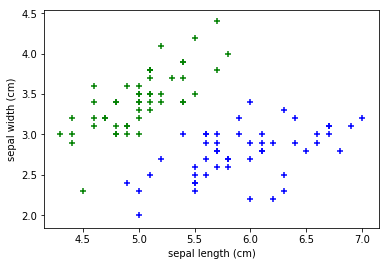

In [34]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')
plt.show()

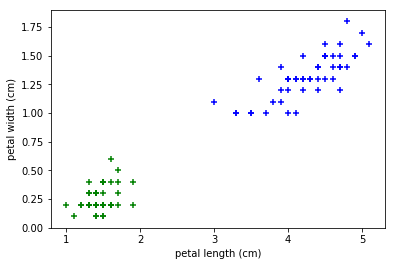

In [35]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='+')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
x=df.drop(['target','flower_name'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [78]:
x_train,x_test,y_tarin,y_test=train_test_split(x,y,test_size=0.3)

In [79]:
len(x_train)

105

In [80]:
len(x_test)

45

In [81]:
from sklearn.svm import SVC
model=SVC()

In [82]:
model.fit(x_train,y_tarin)

/home/abhishek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [83]:
model.score(x_test,y_test)

0.9555555555555556

In [85]:
predicted_result=pd.DataFrame(model.predict(x_train))
predicted_result.columns=['predicted_result']
predicted_result.head()

,predicted_result
0,2
1,0
2,0
3,1
4,1


In [86]:
predicted_df=pd.concat([df,predicted_result],axis=1)
predicted_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,predicted_result
0,5.1,3.5,1.4,0.2,0,setosa,2.0
1,4.9,3.0,1.4,0.2,0,setosa,0.0
2,4.7,3.2,1.3,0.2,0,setosa,0.0
3,4.6,3.1,1.5,0.2,0,setosa,1.0
4,5.0,3.6,1.4,0.2,0,setosa,1.0


In [87]:
y_predicted=model.predict(x_test)
y_predicted
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[16,  0,  0],
       [ 0, 17,  2],
       [ 0,  0, 10]])

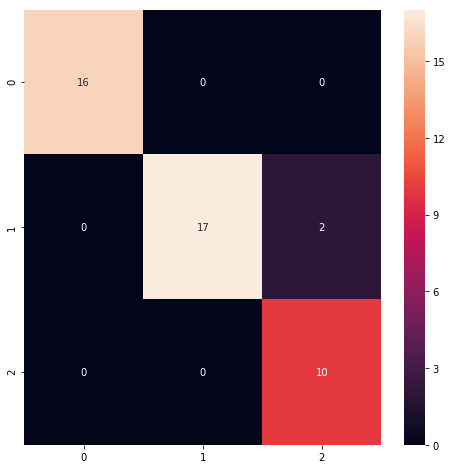

In [92]:
import seaborn as sb
plt.figure(figsize=(8,8))
plt.xlabel('Y_predicted',fontsize=20)
plt.ylabel('Y_truth',fontsize=20)
sb.heatmap(cm,annot=True)
plt.show()